# Introduction

## Distributions

### Joint Distributions

In [51]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
prob = JPD(['I','D','G'],[2,2,3],
           [0.126,0.168,0.126,0.009,0.045,0.126,0.252,0.0224,0.0056,0.06,0.036,0.024])

In [52]:
print(prob)

+------+------+------+------------+
| I    | D    | G    |   P(I,D,G) |
+======+======+======+============+
| I(0) | D(0) | G(0) |     0.1260 |
+------+------+------+------------+
| I(0) | D(0) | G(1) |     0.1680 |
+------+------+------+------------+
| I(0) | D(0) | G(2) |     0.1260 |
+------+------+------+------------+
| I(0) | D(1) | G(0) |     0.0090 |
+------+------+------+------------+
| I(0) | D(1) | G(1) |     0.0450 |
+------+------+------+------------+
| I(0) | D(1) | G(2) |     0.1260 |
+------+------+------+------------+
| I(1) | D(0) | G(0) |     0.2520 |
+------+------+------+------------+
| I(1) | D(0) | G(1) |     0.0224 |
+------+------+------+------------+
| I(1) | D(0) | G(2) |     0.0056 |
+------+------+------+------------+
| I(1) | D(1) | G(0) |     0.0600 |
+------+------+------+------------+
| I(1) | D(1) | G(1) |     0.0360 |
+------+------+------+------------+
| I(1) | D(1) | G(2) |     0.0240 |
+------+------+------+------------+


### Conditioning and Renormalizing

In [8]:
print(prob.conditional_distribution([('G', 0)], inplace=False))

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.2819 |
+------+------+----------+
| I(0) | D(1) |   0.0201 |
+------+------+----------+
| I(1) | D(0) |   0.5638 |
+------+------+----------+
| I(1) | D(1) |   0.1342 |
+------+------+----------+


### Marginalizing

In [9]:
print(prob.marginalize(['G'], inplace=False))

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.4200 |
+------+------+----------+
| I(0) | D(1) |   0.1800 |
+------+------+----------+
| I(1) | D(0) |   0.2800 |
+------+------+----------+
| I(1) | D(1) |   0.1200 |
+------+------+----------+


In [10]:
print(prob.marginalize(['G', 'I'], inplace=False))

+------+--------+
| D    |   P(D) |
+======+========+
| D(0) | 0.7000 |
+------+--------+
| D(1) | 0.3000 |
+------+--------+


# Bayesian Network Fundamentals

* A Bayesian network is:
 - A directed acyclic graph (DAG)
   (Acyclic means that has no cycles that is you don't, you can't    reverse the edges and get back you started.)
 - For for each node in the graph, $X_i$, we have a CPD $P(X_i|parents_G(X_i)) $
* The BN represents a joint probability distribution via the chain rule for Bayesian networks
$$P(X_0, ..., X_n) = \prod_iP(X_i|parents_G(X_i)) $$

In [11]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])

# Defining individual CPDs.
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6, 0.4]])
cpd_i = TabularCPD(variable='I', variable_card=2, values=[[0.7, 0.3]])

# The representation of CPD in pgmpy is a bit different than the CPD shown in the above picture. In pgmpy the colums
# are the evidences and rows are the states of the variable. So the grade CPD is represented like this:
#
#    +---------+---------+---------+---------+---------+
#    | diff    | intel_0 | intel_0 | intel_1 | intel_1 |
#    +---------+---------+---------+---------+---------+
#    | intel   | diff_0  | diff_1  | diff_0  | diff_1  |
#    +---------+---------+---------+---------+---------+
#    | grade_0 | 0.3     | 0.05    | 0.9     | 0.5     |
#    +---------+---------+---------+---------+---------+
#    | grade_1 | 0.4     | 0.25    | 0.08    | 0.3     |
#    +---------+---------+---------+---------+---------+
#    | grade_2 | 0.3     | 0.7     | 0.02    | 0.2     |
#    +---------+---------+---------+---------+---------+

cpd_g = TabularCPD(variable='G', variable_card=3, 
                   values=[[0.3, 0.05, 0.9,  0.5],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7,  0.02, 0.2]],
                  evidence=['I', 'D'],
                  evidence_card=[2, 2])

cpd_l = TabularCPD(variable='L', variable_card=2, 
                   values=[[0.1, 0.4, 0.99],
                           [0.9, 0.6, 0.01]],
                   evidence=['G'],
                   evidence_card=[3])

cpd_s = TabularCPD(variable='S', variable_card=2,
                   values=[[0.95, 0.2],
                           [0.05, 0.8]],
                   evidence=['I'],
                   evidence_card=[2])

# Associating the CPDs with the network
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()

True

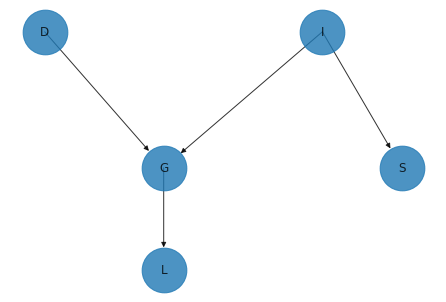

In [12]:
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True, node_size=2000, alpha=0.8,
        pos={'D': (1, 8),
             'I': (8, 8),
             'G': (4, 4),
             'L': (4, 1),
             'S': (10, 4)})
plt.show()

## Chain Rule for Bayesian Networks

General:
$$P(X_0, ..., X_n) = \prod_iP(X_i|parents_G(X_i)) $$

In the above case:
$$P(D, I, G, S, L) = P(D)P(I)P(G|I, D)P(S|I)P(L|P)$$

### Factorization

$P(L|d^0, i^1, g^2, s^1)$


In [13]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
prob = infer.query(variables = ['L'],
                   evidence =  {'D': 0,
                                'I': 1,
                                'G': 2,
                                'S': 1})
print(prob)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.9900 |
+------+----------+
| L(1) |   0.0100 |
+------+----------+


$P(d^0, i^1, g^2, s^1, l^1)$

In [14]:
# Taking the values manually from the CPD's above, we get:
0.6*0.3*0.02*0.01*0.8

2.8800000000000002e-05

In [15]:
from pgmpy.factors.discrete import DiscreteFactor

In [16]:
prob = (cpd_d.product(cpd_i, inplace=False)\
             .product(cpd_g, inplace=False)\
             .product(cpd_s, inplace=False)
             .product(cpd_l, inplace=False))

In [17]:
prob.variables

['D', 'I', 'G', 'S', 'L']

In [18]:
prob.values.shape

(2, 2, 3, 2, 2)

In [19]:
# Taking the values from the product of the CPD's using pgmpy:
prob.values[0, 1, 2, 1, 1]

2.8800000000000002e-05

* BN (Bayesian Network) is a Legal Distribution if: 

  - P $\geq$ 0
   - _Proof_ P is a product of CPD's, which are non_negative
  - $\sum P = 1$
   - _Proof_ 
   $$ \sum _{D, I, G, S, L} P(D, I, G, S, L) $$
   $$= \sum _{D, I, G, S, L} P(D)P(I)P(G|I, D)P(S|I)P(L|P)$$
   $$= \sum _{D, I, G, S} P(D)P(I)P(G|I, D)P(S|I) \sum _LP(L|P)$$
   $$= \sum _{D, I, G} P(D)P(I)P(G|I, D) \sum _SP(S|I) \sum _LP(L|P)$$
   $$= \sum _D P(D) \sum _I P(I) \sum _G P(G|I, D) \sum _SP(S|I) \sum _LP(L|P)$$
   $$= 1 + 1 + 1 + 1 + 1 $$
   $$=1$$

### Reasoning Patterns

#### Causal Reasoning

$$P(l^1) \approx 0.5 $$

In [20]:
print("The prob of getting a strong letter is:")
infer.query(variables = ['L'], show_progress=False).values[1]

The prob of getting a strong letter is:


0.5023360000000001

$$P(l^1| i^0) \approx 0.39 $$

In [21]:
print("The prob of getting a strong letter, given low intelligence, however is lower:")
infer.query(variables = ['L'],
            evidence =  {'I': 0},
            show_progress=False).values[1]

The prob of getting a strong letter, given low intelligence, however is lower:


0.3886

$$P(l^1| i^0, d^0) \approx 0.51 $$

In [22]:
print("The prob of getting a strong letter, given low intelligence and a course which is not difficult, on the other hand, is higher:")
infer.query(variables = ['L'],
            evidence =  {'I': 0,
                        'D': 0},
            show_progress=False).values[1]

The prob of getting a strong letter, given low intelligence and a course which is not difficult, on the other hand, is higher:


0.513

#### Evidential Reasoning

In [23]:
print(f"""The overall prob that the course is difficult is: \
      {infer.query(variables = ['D'], show_progress=False).values[1]}""")
print(f"""The overall prob that the course is difficult is, given a bad grade, is higher: \
      {round(infer.query(variables = ['D'],
       evidence = {'G': 2},
       show_progress=False).values[1] ,2)}""")

The overall prob that the course is difficult is:       0.4
The overall prob that the course is difficult is, given a bad grade, is higher:       0.63


In [24]:
print(f"""The overall prob that the student is intelligent is: \
      {infer.query(variables = ['I'], show_progress=False).values[1]}""")
print(f"""The overall prob that the student is intelligent, given a bad grade, is lower: \
      {round(infer.query(variables = ['I'],
       evidence = {'G': 2},
       show_progress=False).values[1] ,2)}""")

The overall prob that the student is intelligent is:       0.3
The overall prob that the student is intelligent, given a bad grade, is lower:       0.08


#### Intercausal Reasoning

In [25]:
print(f"""The overall prob that the student is intelligent is: \
      {infer.query(variables = ['I'], show_progress=False).values[1]}""")
print(f"""The overall prob that the student is intelligent, given a bad grade, is lower: \
      {round(infer.query(variables = ['I'],
       evidence = {'G': 2},
       show_progress=False).values[1] ,2)}""")
print(f"""The overall prob that the student is intelligent, given a bad grade and the class is hard, is a bit higher again: \
      {round(infer.query(variables = ['I'],
       evidence = {'G': 2,
                   'D': 1},
       show_progress=False).values[1] ,2)}""")

The overall prob that the student is intelligent is:       0.3
The overall prob that the student is intelligent, given a bad grade, is lower:       0.08
The overall prob that the student is intelligent, given a bad grade and the class is hard, is a bit higher again:       0.11


### Flow of Probabilistic Influence

#### Without evidence about Z

When can X influence Y?
- X -> Y YES
- X <- Y YES
- X -> W -> Y YES
- X <- W <- Y YES
- X <- W -> Y YES
- X -> W <- Y NO (V-Structure) 

In [26]:
# Example of X -> W <- Y NO
print(f"""The overall prob that the test is difficult given the student is intelligent versus not intelligent is the same
      {round(infer.query(variables = ['D'],
       evidence = {'I': 1},
       show_progress=False).values[1] ,2)} = 
      {round(infer.query(variables = ['D'],
       evidence = {'I': 0},
       show_progress=False).values[1] ,2)}""")

The overall prob that the test is difficult given the student is intelligent versus not intelligent is the same
      0.4 = 
      0.4


In [27]:
# Example of X <- W -> Y YES
print(f"""The overall prob that the students gets an C grade given
          the a good versus bad SAT score, changes
      {round(infer.query(variables = ['G'],
       evidence = {'S': 1},
       show_progress=False).values[2] ,2)} != 
      {round(infer.query(variables = ['G'],
       evidence = {'S': 0},
       show_progress=False).values[2] ,2)}""")

The overall prob that the students gets an C grade given
          the a good versus bad SAT score, changes
      0.14 != 
      0.43


#### Concept of Active Trails

A trail $ X_1 - ...- X_k $ is active if it has no v-structures $ X_{i-1} -> X_i <- X_{i+1} $

In [28]:
model.is_active_trail(start='D', end='I')

False

In [29]:
model.is_active_trail(start='G', end='S')

True

In [30]:
model.is_active_trail(start='S', end='G', observed=['I'])

False

#### Given evidence about Z

|             | W $\notin$ Z | W $\in$ Z |
|-------------|--------------|-----------|
| X -> Y      |       V      |     V     |
| X <- Y      |       V      |     V     |
| X -> W -> Y |       V      |     X     |
| X <- W -> Y |       V      |     X     |
| X -> W <- Y |   X (Note1)  | V (Note2) |

(Note1) If W and all of its descendants not in Z

(Note2) Either W or one of its descendants is in Z

In [31]:
model.is_active_trail(start='S', end='D', observed=['I'])

False

In [32]:
model.is_active_trail(start='S', end='D')

False

In [33]:
model.is_active_trail(start='S', end='D', observed=['G'])

True

In [34]:
model.is_active_trail(start='S', end='D', observed=['L'])

True

A trail $X_1- ... - X_k$is active given Z, if:
- Every V-structure $X_{i-1} -> X_i <- X_{i+1}$ needs to be activated and the only way we can activate a V-structure is if $X_i$ or one of its descendants is observed, that is $\in Z$. 
- No other $X_i$ (that are not in V-structures), are observed, or all other $X_i \notin Z$

## Independencies

For events $ \alpha, \beta, P \models \alpha \perp \beta $ if: 
- P($\alpha, \beta) or P(\alpha \cap \beta)= P(\alpha)P(\beta)$ (both holding true)

OR

- $P(\alpha|\beta) = P(\alpha) $

OR

- $P(\beta|\alpha) = P(\beta) $

For random variables $ X, Y, P \models X \perp Y $ if: 
- P($X, Y) or P(X \cap Y)= P(X)P(Y)$ (both holding true)

OR

- $P(X|Y) = P(X) $

OR

- $P(Y|X) = P(Y) $

In [53]:
jpd_i_d  = prob.marginalize(['G'], inplace=False)
print(jpd_i_d)

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.4200 |
+------+------+----------+
| I(0) | D(1) |   0.1800 |
+------+------+----------+
| I(1) | D(0) |   0.2800 |
+------+------+----------+
| I(1) | D(1) |   0.1200 |
+------+------+----------+


In [55]:
jpd_i_d.check_independence(['D'], ['I'])

True

In [54]:
jpd_i_d.get_independencies()

(I _|_ D)

### Conditional Independence

For (sets of) random variables $ X, Y, Z, P \models (X \perp Y | Z)$ if: 
- P($X, Y |Z) = P(X|Z)P(Y|Z)$

OR

- $P(X|Y, Z) = P(X|Z) $

OR

- $P(Y|X, Z) = P(Y|Z) $

OR 

- $P(X, Y, Z) \propto \phi_1 (X, Z)  \phi_2 (Y, Z) $

In [83]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
jpd_i_s_g = JPD(['I','S','G'],[2,2,3],
                [0.114,
                 0.1938,
                 0.2622,
                 0.006,
                 0.0102,
                 0.0138,
                 0.252,
                 0.0224,
                 0.0056,
                 0.108,
                 0.0096,
                 0.0024])
print(jpd_i_s_g.marginalize(['I'],
                            inplace=False).check_independence(['G'],
                                                              ['S']))
print(jpd_i_s_g.conditional_distribution([('I',0)], 
                                         inplace=False)\
      .check_independence(['G'], ['S']))

False
True


In [86]:
# Conditioning can also result in the loss of independence
print(prob.marginalize(['G'], inplace=False).check_independence(['I'], ['D']))
print(prob.conditional_distribution([('G',1)], inplace=False).check_independence(['I'], ['D']))

True
False


In [38]:
model.get_independencies()

(D _|_ S, I)
(D _|_ I | S)
(D _|_ S | I)
(D _|_ L | G)
(D _|_ L | S, G)
(D _|_ S, L | G, I)
(D _|_ S | I, L)
(D _|_ L | S, I, G)
(D _|_ S | G, I, L)
(G _|_ S | I)
(G _|_ S | D, I)
(G _|_ S | I, L)
(G _|_ S | D, I, L)
(I _|_ D)
(I _|_ L | G)
(I _|_ D | S)
(I _|_ L | D, G)
(I _|_ L | S, G)
(I _|_ L | D, G, S)
(L _|_ S | I)
(L _|_ D, I, S | G)
(L _|_ S | D, I)
(L _|_ S, I | D, G)
(L _|_ D, S | G, I)
(L _|_ D, I | S, G)
(L _|_ S | D, I, G)
(L _|_ I | D, G, S)
(L _|_ D | G, I, S)
(S _|_ D)
(S _|_ D, G, L | I)
(S _|_ L | G)
(S _|_ G, L | D, I)
(S _|_ L | D, G)
(S _|_ D, L | G, I)
(S _|_ D, G | I, L)
(S _|_ L | D, I, G)
(S _|_ G | D, I, L)
(S _|_ D | G, I, L)

## Independence In Bayesian Networks

### d-separation

In [88]:
model2 = BayesianModel([('C', 'D'),
                        ('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S'),
                        ('L', 'J'), ('S', 'J'), ('G', 'H'), ('J', 'H')])

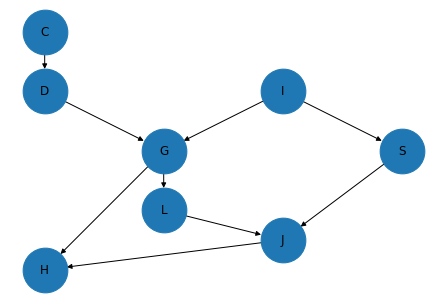

In [89]:
nx.draw(model2, with_labels=True, node_size=2000,
        pos={'C': (1, 9),
             'D': (1, 7),
             'I': (3, 7),
             'G': (2, 5),
             'L': (2, 3),
             'S': (4, 5),
             'J': (3, 2),
             'H': (1, 1)})
plt.show()

In [94]:
print(model2.is_active_trail(start='D', end='J', observed=['L', 'H', 'I']))
print(model2.is_active_trail(start='D', end='I', observed=['L']))
print(model2.is_active_trail(start='D', end='J', observed=['L']))
print(model2.is_active_trail(start='D', end='J', observed=['L', 'I']))

True
True
True
False


Any node is d-separated from its non-descendants given its parents

In [95]:
print(model2.is_active_trail(start='S', end='L', observed=['G']))

False


### I-maps

In [153]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import JointProbabilityDistribution

G1 = BayesianModel([('D', 'I')])
diff_cpd = TabularCPD('D', 2, [[0.6], [0.4]])
intel_cpd = TabularCPD('I', 2, [[0.7], [0.3]])
G1.add_cpds(intel_cpd, diff_cpd)
G1.remove_edge('D', 'I')

G2 = BayesianModel([('D', 'I')])
G2.add_cpds(diff_cpd, intel_cpd)

val1 = [0.42, 0.18, 0.28, 0.12]
val2 = [0.282, 0.02, 0.564, 0.134]
P1 = JointProbabilityDistribution(['I', 'D'], [2, 2], val1)
P2 = JointProbabilityDistribution(['I', 'D'], [2, 2], val2)

In [154]:
print(P1)
print(P2)

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.4200 |
+------+------+----------+
| I(0) | D(1) |   0.1800 |
+------+------+----------+
| I(1) | D(0) |   0.2800 |
+------+------+----------+
| I(1) | D(1) |   0.1200 |
+------+------+----------+
+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.2820 |
+------+------+----------+
| I(0) | D(1) |   0.0200 |
+------+------+----------+
| I(1) | D(0) |   0.5640 |
+------+------+----------+
| I(1) | D(1) |   0.1340 |
+------+------+----------+


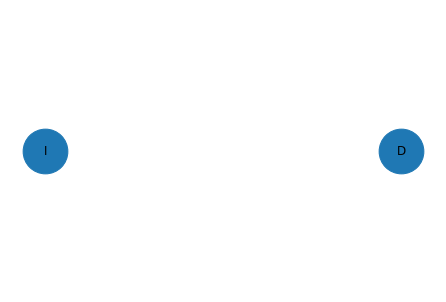

In [155]:
import networkx as nx
import pylab as plt
nx.draw(G1,with_labels=True, node_size=2000,
        pos={'I': (0, 0),
             'D': (1, 0)})
plt.show()

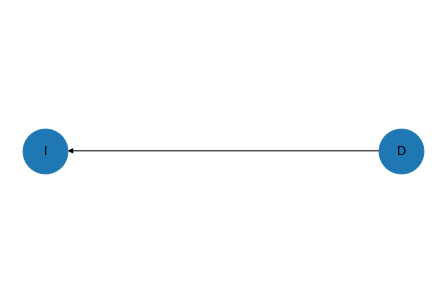

In [156]:
import networkx as nx
import pylab as plt
nx.draw(G2,with_labels=True, node_size=2000,
        pos={'I': (0, 0),
             'D': (1, 0)})
plt.show()

In [157]:
P1.get_independencies()

(I _|_ D)

In [158]:
P2.get_independencies()

In [159]:
G1.get_independencies()

(D _|_ I)
(I _|_ D)

In [160]:
G2.get_independencies()

In [161]:
# !!!! Not getting the same results as in the course !!!!
print(G1.is_imap(P1))
print(G1.is_imap(P2))
print(G2.is_imap(P1))
print(G2.is_imap(P2))

False
False
False
False


In [131]:
# Example from https://pgmpy.org/models.html?highlight=is_imap#pgmpy.models.BayesianModel.BayesianModel.is_imap
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import JointProbabilityDistribution
G = BayesianModel([('diff', 'grade'), ('intel', 'grade')])
diff_cpd = TabularCPD('diff', 2, [[0.2], [0.8]])
intel_cpd = TabularCPD('intel', 3, [[0.5], [0.3], [0.2]])
grade_cpd = TabularCPD('grade', 3,
                       [[0.1,0.1,0.1,0.1,0.1,0.1],
                        [0.1,0.1,0.1,0.1,0.1,0.1],
                         [0.8,0.8,0.8,0.8,0.8,0.8]],
                        evidence=['diff', 'intel'],
                        evidence_card=[2, 3])
G.add_cpds(diff_cpd, intel_cpd, grade_cpd)
val = [0.01, 0.01, 0.08, 0.006, 0.006, 0.048, 0.004, 0.004, 0.032,
       0.04, 0.04, 0.32, 0.024, 0.024, 0.192, 0.016, 0.016, 0.128]
JPD = JointProbabilityDistribution(['diff', 'intel', 'grade'], [2, 3, 3], val)
G.is_imap(JPD)

True

In [162]:
G.get_independencies()

(diff _|_ intel)
(intel _|_ diff)

In [163]:
JPD.get_independencies()

(diff _|_ intel)
(diff _|_ grade)
(intel _|_ grade)

## Other

In [78]:
model3 = BayesianModel([('A', 'C'), ('B', 'C'), ('B', 'D'), ('A', 'E'), ('C', 'E')])

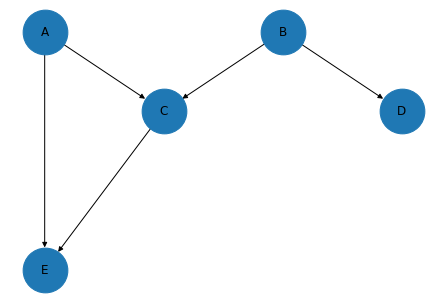

In [79]:
nx.draw(model3, with_labels=True, node_size=2000,
        pos={'A': (1, 7),
             'B': (3, 7),
             'C': (2, 5),
             'D': (4, 5),
             'E': (1, 1)})
plt.show()

In [80]:
model3.get_independencies()

(A _|_ B, D)
(A _|_ D | B)
(A _|_ B | D)
(A _|_ D | B, C)
(A _|_ D | B, E)
(A _|_ D | B, C, E)
(C _|_ D | B)
(C _|_ D | B, A)
(C _|_ D | B, E)
(C _|_ D | B, A, E)
(B _|_ A)
(B _|_ A | D)
(B _|_ E | C, A)
(B _|_ E | D, C, A)
(D _|_ A)
(D _|_ C, E, A | B)
(D _|_ A, E | B, C)
(D _|_ C, A | B, E)
(D _|_ C, E | B, A)
(D _|_ E | C, A)
(D _|_ A | B, C, E)
(D _|_ E | B, C, A)
(D _|_ C | B, A, E)
(E _|_ D | B)
(E _|_ D | B, C)
(E _|_ D | B, A)
(E _|_ B, D | C, A)
(E _|_ D | B, C, A)
(E _|_ B | D, C, A)

In [91]:
model3.is_active_trail(start='B', end='C', observed='E')

True